# Optimal Stimulus

This section computes the optimal level of public expenditure for any given current unemployment rate by using the sufficient-statistics formula.

In [1]:
# %load setup.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick
%run helpers.ipynb

## Calculating Optimal Stimulus

First, we load the calibrated parameter values from our previous section.

In [2]:
%store -r params
params

{'s': 0.03557894736842106,
 'u_bar': 0.05974999999999999,
 'x_bar': 0.557752047505985,
 'GC_bar': 0.19191729280673472,
 'M_bar': 0.5,
 'M_bar_l': 0,
 'M_bar_h': 2,
 'epsilon': 1,
 'epsilon_h': 1.5,
 'epsilon_l': 0.5,
 'eta': 0.6,
 'eta_l': 0.5,
 'eta_h': 0.7,
 'omega': 0.7071671173494025,
 'rho': 1.080804575426955,
 'tau': 0.03873194401199106,
 'm': 0.4702564229442872,
 'z0': 2.827830175507158,
 'z1': 2.2609135556386306}

Setting $u_0 = 9\%$ and $\eta = 0.6$, we first calculate $m$'s for a given range of $M$'s:

In [3]:
u0 = 0.09
M_vals = np.linspace(start=params['M_bar_l'], stop=params['M_bar_h'], num=101)
m_vals = m_func(M=M_vals, eta=params['eta'], u=params['u_bar'], GY=GY_func(params['GC_bar']), tau=params['tau'])

We now calculate optimal stimulus with the following equation:

                $\frac{g/c - (g/c)^*}{(g/c)^*} \approx \frac{z_0 \epsilon m}{1 + z_1 z_0\epsilon m^2}\cdot \frac{u_0 - \bar{u}}{\bar{u}}.$          [![Generic badge](https://img.shields.io/badge/MS19-Eq%2023-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

For convenience of calculating optimal stimulus as percentage of GDP for different $\epsilon$'s, we define the following wrapper:

In [4]:
stim_func = lambda epsilon:GY_func((suffstat_func(m=m_vals, z0=params['z0'], z1=params['z1'],
                                                  epsilon=epsilon, u0=u0, u_bar=params['u_bar']) + 1)*params['GC_bar']) - GY_func(params['GC_bar'])

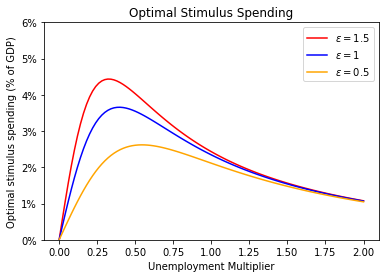

In [6]:
stim_vals = stim_func(epsilon=params['epsilon'])
stim_vals_h = stim_func(epsilon=params['epsilon_h'])
stim_vals_l = stim_func(epsilon=params['epsilon_l'])
stim_range = pd.DataFrame(index=M_vals,
                          data={f'$\epsilon = ${params["epsilon_h"]}':stim_vals_h, 
                                f'$\epsilon = ${params["epsilon"]}':stim_vals,
                                f'$\epsilon = ${params["epsilon_l"]}':stim_vals_l})
stim_range_ax = stim_range.plot(title=r"Optimal Stimulus Spending", color=['red', 'blue', 'orange'])
stim_range_ax.set(xlabel='Unemployment Multiplier', ylabel='Optimal stimulus spending (% of GDP)', ylim=[0, 0.06])
stim_range_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))